# Графовi ймовiрнiснi моделi

##  Практична робота 6

### Практичні роботи 
* ### 14, 15 Моделювання поведінки випадкового процесу та стаціонарної густини ймовірності у моделі багатовимірного потенціалу; 
* ### 16 Фур’є - аналіз даних

**_Студентка Пороскун Олена. Група ПМ.м-21_**

*8(1) варіант*

_________________________________________________________________________________________________________________________

**Завдання** 

Побудувати рис. 2.1-2.7 − номер рисунка відповідає варіанту згідно зі списком групи. 
(Пояснення. Методика аналітичного розрахунку фазової діаграми в розд. 2 в файлі pract_6_variant_1.docx)

**Параметри системи:**

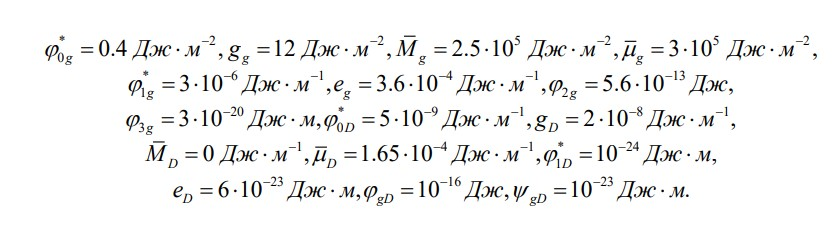

**Доповнені параметри:**

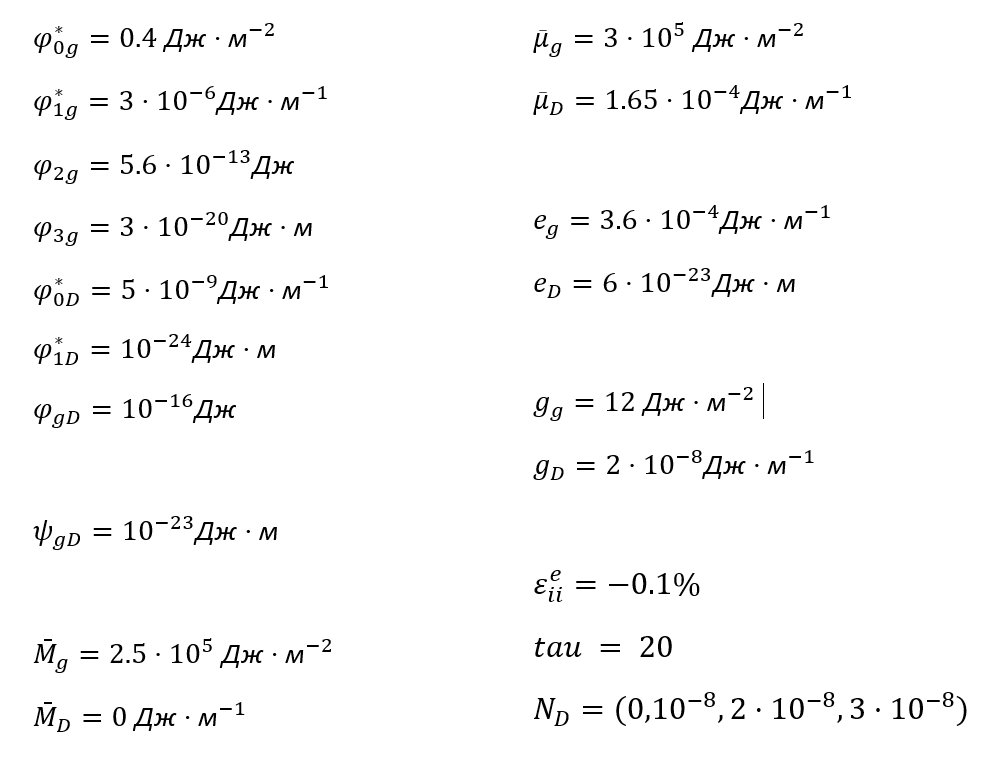

**Рисунок згідно з 1 варіантом, який необхідно отримати:**

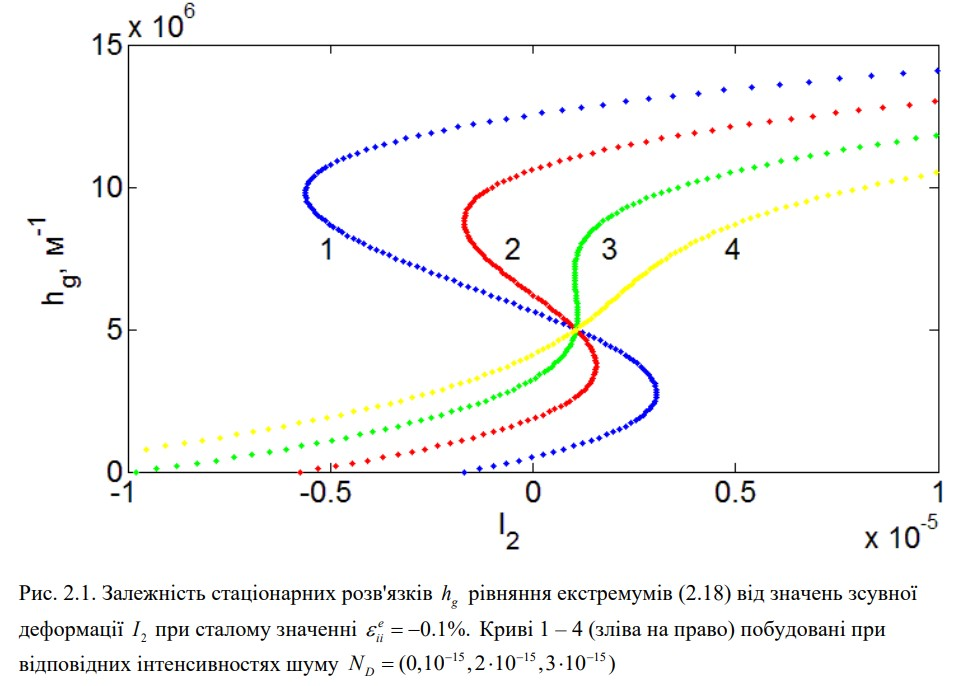

_________________________________________________________________________________________________________________________

**Код** 

In [1]:
import math
import matplotlib.pyplot as plt

**Знаходимо $I_2$ за формулою 2.19:**

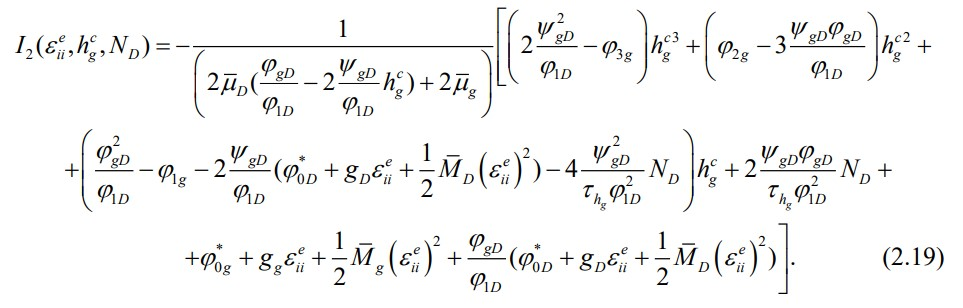

In [2]:
def find_I2(hg_all, N_D):
    
    varphi_0g = 0.4                  
    varphi_1g = 3*10**(-6)            
    varphi_2g = 5.6*10**(-13)           
    varphi_3g = 3*10**(-20)             
    varphi_0D = 5*10**(-9) 
    varphi_1D = 10**(-24)
    varphi_gD = 10**(-16)

    psi_gD = 10**(-23)

    M_g = 2.5*10**5 
    M_D = 0 

    mu_g = 3*10**5 
    mu_D = 1.65*10**(-4) 

    e_g = 3.6*10**(-4) 
    e_D = 6*10**(-23) 

    g_g = 12 
    g_D = 2*10**(-8) 

    vareps_ii = -0.1 / 100 # -0.1%
    
    tau = 20
    
    I2_all = []
    for hg in hg_all:
        I2 = -(1/(2*mu_D*(varphi_gD/varphi_1D - 2*(psi_gD/varphi_1D) * hg) + 2*mu_g)) \
            * ( (2*(psi_gD**2)/varphi_1D - varphi_3g)*(hg**3) + (varphi_2g-3*psi_gD*varphi_gD/varphi_1D)*(hg**2) \
            + ((psi_gD**2)/varphi_1D - varphi_1g - 2*psi_gD/varphi_1D*(varphi_0D + g_D*vareps_ii + 0.5*M_D*(vareps_ii**2))\
            - 4*(psi_gD**2)/(tau*(varphi_1D**2))*N_D)*hg + 2*psi_gD*varphi_gD/(tau*(varphi_1D**2))*N_D 
            + varphi_0g + g_g*vareps_ii + 0.5*M_g*(vareps_ii**2) \
            + (varphi_gD/varphi_1D)*(varphi_0D + g_D*vareps_ii + 0.5*M_D*(vareps_ii**2)) )
        I2_all.append(I2)
        
    return I2_all

**Додаємо ще необхідні змінні та параметри.**

In [3]:
hg_all = [i for i in range(0, 15*(10**6), 10**5)]
colors = ['hotpink','darkviolet','mediumblue', 'mediumturquoise']

N_D_all = [0, 1*10**(-8), 2*10**(-8), 3*10**(-8)]
print('N_D:', N_D_all)

N_D: [0, 1e-08, 2e-08, 3.0000000000000004e-08]


**Будуємо всі 4 криві.**

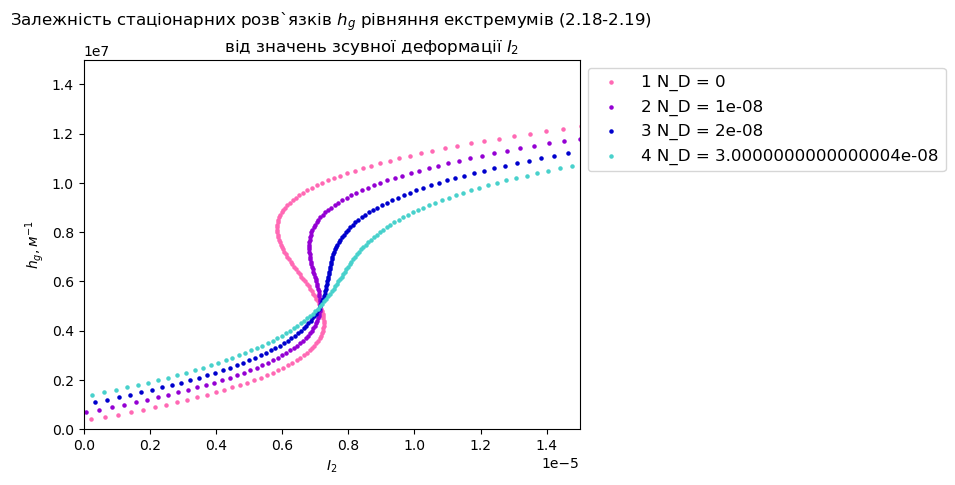

In [4]:
def fun_plot1(hg_all, N_D_all):
    
    for i in range(len(N_D_all)):
        I_2 = find_I2(hg_all, N_D_all[i])
        plt.scatter(I_2, hg_all, s = 5, c = colors[i], label = f"{i+1}" ' N_D = 'f"{N_D_all[i]}")
        
    plt.xlabel('$I_2$')
    plt.ylabel('$h_g, м^{-1}$') 
    plt.title('Залежність стаціонарних розв`язків ' "$h_g$" ' рівняння екстремумів (2.18-2.19) \n \
              від значень зсувної деформації ' "$I_2$")
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
    plt.axis([0*10**(-5), 1.5*10**(-5), 0, 15*(10**6)])
    
fun_plot1(hg_all, N_D_all)

*Рис. 2.1. Залежність стаціонарних розв'язків $h_g$ рівняння екстремумів (2.18) від значень зсувної деформації $I_2$ при сталому значенні $ε_{ii}^e=-0.1\%$. 
Криві 1 – 4 (зліва на право) побудовані при відповідних інтенсивностях шуму $N_D=(0, 10^{-8}, 2⋅10^{-8}, 3⋅10^{-8}).$
Значення $\tau = 20.$*

_________________________________________________________________________________________________________________________